## **Heart disease prediction using machine learning techniques** 

**DATASET DESCRIPTION :**

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [ ]:
# Importing the Dataset
import pandas as pd
df = pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


## **Expolatory Data Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
Y = df['target'] # Output Feature

1    526
0    499
Name: target, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


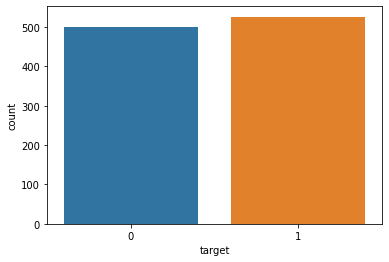

In [ ]:
ax = sns.countplot(df["target"])
target_temp = df.target.value_counts()
print(target_temp)

In [ ]:
print("Percentage of patience without heart problems : {}%".format(str(round(target_temp[0]*100/1025,2))))
print("Percentage of patience with heart problems : {}%".format(str(round(target_temp[1]*100/1025,2))))

Percentage of patience without heart problems : 48.68%
Percentage of patience with heart problems : 51.32%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    713
0    312
Name: sex, dtype: int64


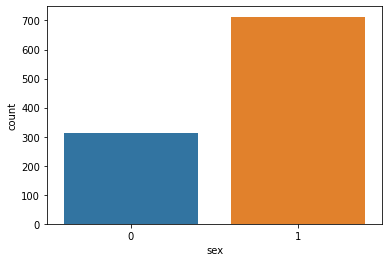

In [ ]:
ax = sns.countplot(df["sex"])
target_temp = df.sex.value_counts()
print(target_temp)

In [ ]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients : {:.2f}%".format((countFemale)/(len(df.sex))*100))
print("Percentage of Male Patients : {:.2f}%".format((countMale)/(len(df.sex))*100))

Percentage of Female Patients : 30.44%
Percentage of Male Patients : 69.56%


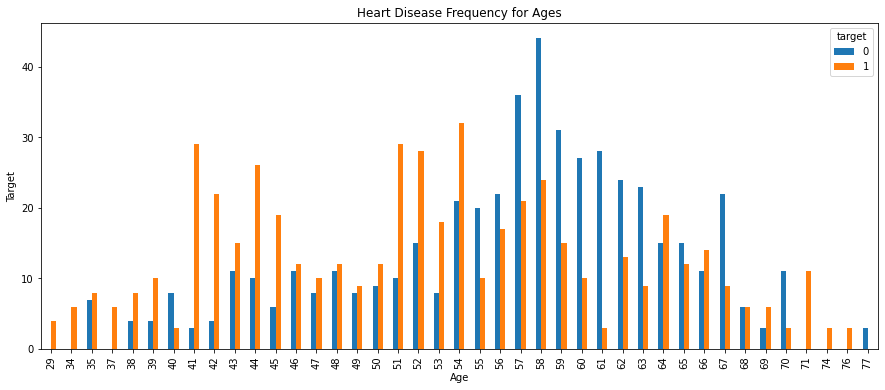

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Target')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

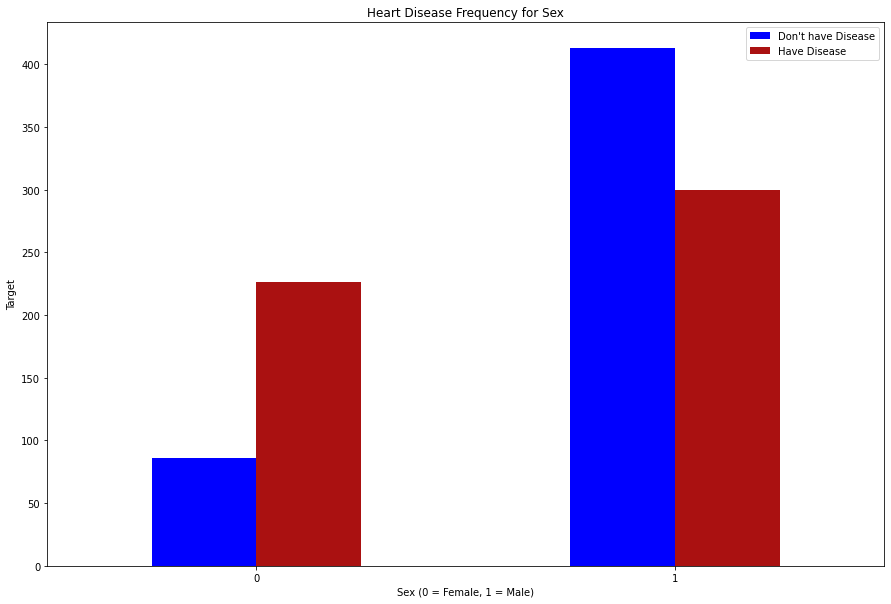

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Target')
plt.show()

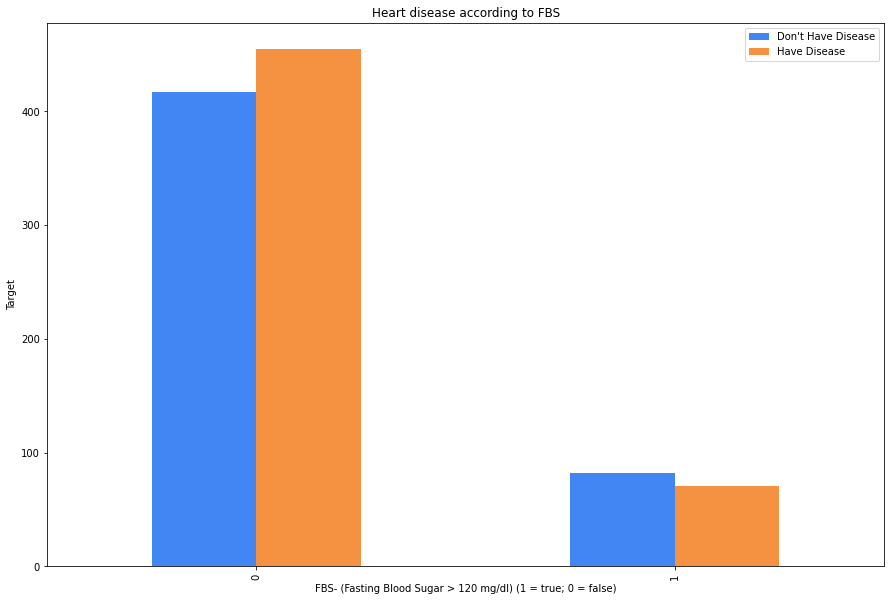

In [ ]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Target')
plt.show()

In [ ]:
#Input Feature
X = df.iloc[:,:13]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(768, 13)
(257, 13)
(768,)
(257,)


In [ ]:
from sklearn.preprocessing import StandardScaler 

**Feature Scaling - Standardization**

In [ ]:
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.375602,0.643712,-0.920945,1.628589,0.803737,-0.421799,-0.974697,-1.780580,1.393746,0.419789,-0.661968,2.161679,-0.521986
1,-0.504618,0.643712,-0.920945,0.711318,-0.901484,-0.421799,-0.974697,-1.002421,1.393746,-0.117392,-0.661968,-0.735650,1.094487
2,1.154399,0.643712,1.985709,0.367341,0.724425,2.370799,-0.974697,1.072671,-0.717491,0.330259,-0.661968,0.230126,-0.521986
3,-1.168224,0.643712,1.016824,-0.664589,-0.385952,-0.421799,0.920410,0.856516,-0.717491,-0.923163,0.967492,-0.735650,-0.521986
4,1.043798,-1.553491,1.016824,0.482000,1.339097,-0.421799,0.920410,-0.699803,-0.717491,-0.744103,0.967492,-0.735650,1.094487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,-0.615219,0.643712,1.016824,-0.779248,-1.912720,-0.421799,-0.974697,-1.002421,-0.717491,-0.206922,0.967492,2.161679,-0.521986
764,1.375602,-1.553491,1.016824,-0.951236,6.315963,-0.421799,-0.974697,0.467436,-0.717491,0.509319,-0.661968,-0.735650,1.094487
765,1.154399,0.643712,1.985709,0.367341,0.724425,2.370799,-0.974697,1.072671,-0.717491,0.330259,-0.661968,0.230126,-0.521986
766,1.375602,0.643712,-0.920945,-0.664589,-0.167842,-0.421799,0.920410,-3.380131,-0.717491,-0.027862,-0.661968,-0.735650,-0.521986


In [ ]:
x_test = st_x.fit_transform(x_test)
x_test

array([[-1.10017299,  0.71537732,  1.06069792, ...,  1.0843279 ,
        -0.72110617, -0.52255623],
       [ 0.4323173 , -1.39786372,  0.08012466, ...,  1.0843279 ,
         1.25042879, -0.52255623],
       [ 0.97963526,  0.71537732, -0.90044859, ...,  1.0843279 ,
         1.25042879,  1.076217  ],
       ...,
       [ 1.63641681,  0.71537732,  2.04127117, ..., -0.51723687,
         0.26466131, -0.52255623],
       [ 0.87017167,  0.71537732,  1.06069792, ..., -0.51723687,
         2.23619628,  1.076217  ],
       [ 1.08909885,  0.71537732,  2.04127117, ..., -0.51723687,
        -0.72110617, -0.52255623]])

# **Classification Models**

In [ ]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = lr.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predicted':y_pred1}).head(10)

,Actual,Predicted
807,1,1
27,0,1
77,0,0
406,1,1
886,0,0
1,0,0
230,0,0
685,0,0
925,0,0
731,0,1


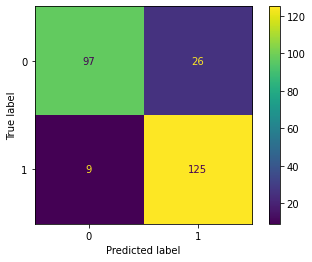

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, accuracy_score
score_lr = accuracy_score(y_test,y_pred1)
cm = confusion_matrix(y_test, y_pred1) 
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = ['0','1'])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       123
           1       0.83      0.93      0.88       134

    accuracy                           0.86       257
   macro avg       0.87      0.86      0.86       257
weighted avg       0.87      0.86      0.86       257



In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2 = dtree.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predicted':y_pred2}).head(10)

,Actual,Predicted
807,1,1
27,0,0
77,0,0
406,1,1
886,0,0
1,0,0
230,0,0
685,0,0
925,0,0
731,0,0


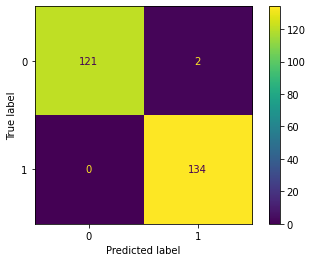

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, accuracy_score
score_dt = accuracy_score(y_test,y_pred2)
cm = confusion_matrix(y_test, y_pred2) 
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = ['0','1'])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       123
           1       0.99      1.00      0.99       134

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



In [ ]:
# K-NN model
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred3 = knn.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predicted':y_pred3}).head(10)

,Actual,Predicted
807,1,1
27,0,0
77,0,0
406,1,1
886,0,0
1,0,0
230,0,0
685,0,0
925,0,0
731,0,0


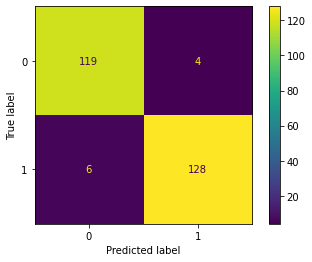

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, accuracy_score
score_knn = accuracy_score(y_test,y_pred3)
cm = confusion_matrix(y_test, y_pred3) 
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = ['0','1'])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       123
           1       0.97      0.96      0.96       134

    accuracy                           0.96       257
   macro avg       0.96      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257



For finding the no of estimators, we used the below code;



from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

params={'n_estimators':range(1,200)}

grid=GridSearchCV(estimator=model,cv=2,param_grid=params,scoring='neg_mean_squared_error')

grid.fit(x_train,y_train)

print("The best estimator returned by GridSearch CV is:",grid.best_estimator_)

**Output :**
The best estimator returned by GridSearch CV is: RandomForestClassifier(n_estimators=154)

In [ ]:
# Random Forest Classifier an Ensemble technique
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=60)
classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=60)

In [ ]:
y_pred4 = classifier.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predicted':y_pred4}).head(10)

,Actual,Predicted
807,1,1
27,0,0
77,0,0
406,1,1
886,0,0
1,0,0
230,0,0
685,0,0
925,0,0
731,0,0


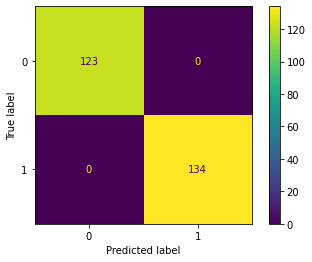

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, accuracy_score
score_rf = accuracy_score(y_test,y_pred4)
cm = confusion_matrix(y_test, y_pred4) 
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = ['0','1'])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       134

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



In [ ]:
# Naive Baye's classifier
from sklearn.naive_bayes import GaussianNB  
gb = GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred5 = gb.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predicted':y_pred5}).head(10)

,Actual,Predicted
807,1,1
27,0,1
77,0,0
406,1,1
886,0,0
1,0,0
230,0,0
685,0,0
925,0,0
731,0,1


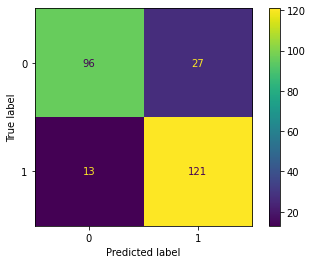

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, accuracy_score
score_nb = accuracy_score(y_test,y_pred5)
cm = confusion_matrix(y_test, y_pred5) 
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = ['0','1'])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       123
           1       0.82      0.90      0.86       134

    accuracy                           0.84       257
   macro avg       0.85      0.84      0.84       257
weighted avg       0.85      0.84      0.84       257



In [ ]:
# Ada Boost classifier
from sklearn.ensemble import AdaBoostClassifier
adbclassifier = AdaBoostClassifier()
adbclassifier.fit(x_train,y_train)

AdaBoostClassifier()

In [ ]:
y_pred6 = adbclassifier.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predicted':y_pred6}).head(10)

,Actual,Predicted
807,1,1
27,0,1
77,0,0
406,1,1
886,0,0
1,0,0
230,0,0
685,0,0
925,0,0
731,0,0


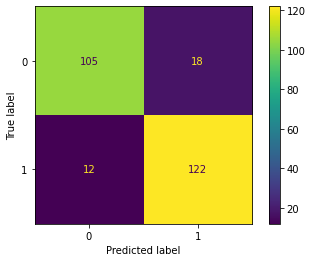

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, accuracy_score
score_adb = accuracy_score(y_test,y_pred6)
cm = confusion_matrix(y_test, y_pred6) 
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = ['0','1'])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       123
           1       0.87      0.91      0.89       134

    accuracy                           0.88       257
   macro avg       0.88      0.88      0.88       257
weighted avg       0.88      0.88      0.88       257



For finding the no of estimators, we used the below code;

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()

params={'n_estimators':range(1,200)}

grid=GridSearchCV(estimator=model,cv=2,param_grid=params,scoring='neg_mean_squared_error')

grid.fit(x_train,y_train)
print("The best estimator returned by GridSearch CV is:",grid.best_estimator_)

**OUTPUT** :

The best estimator returned by GridSearch CV is: GradientBoostingClassifier(n_estimators=164)

In [ ]:
# Gradient Boost classifier
from sklearn.ensemble import GradientBoostingClassifier
modelgf=GradientBoostingClassifier(n_estimators=164)
modelgf.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=164)

In [ ]:
y_pred7 = modelgf.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predicted':y_pred7}).head(10)

,Actual,Predicted
807,1,1
27,0,1
77,0,0
406,1,1
886,0,0
1,0,0
230,0,0
685,0,0
925,0,0
731,0,0


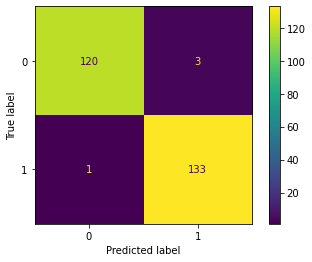

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, accuracy_score
score_gb = accuracy_score(y_test,y_pred7)
cm = confusion_matrix(y_test, y_pred7) 
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = ['0','1'])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       123
           1       0.98      0.99      0.99       134

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



In [ ]:
# Extreme Gradient boost classifier
from xgboost import XGBClassifier  
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier()

In [ ]:
y_pred8 = xgb.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predicted':y_pred8}).head(10)

,Actual,Predicted
807,1,1
27,0,1
77,0,0
406,1,1
886,0,0
1,0,0
230,0,0
685,0,0
925,0,0
731,0,0


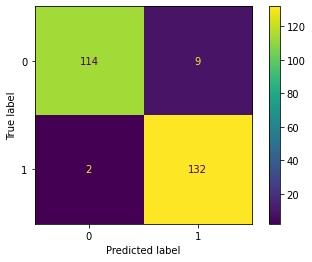

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, accuracy_score
score_xgb = accuracy_score(y_test,y_pred8)
cm = confusion_matrix(y_test, y_pred8) 
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = ['0','1'])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred8))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       123
           1       0.94      0.99      0.96       134

    accuracy                           0.96       257
   macro avg       0.96      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257



In [ ]:
#Neural Networks
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers


classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 13, 
                     units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu", units = 14, 
                     kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )

In [ ]:
classifier.fit(x_train , y_train , batch_size = 8 ,epochs = 100  )

Epoch 1/100
96/96 [==============================] - 1s 4ms/step - loss: 0.6783 - accuracy: 0.7109
Epoch 2/100
96/96 [==============================] - 0s 3ms/step - loss: 0.5153 - accuracy: 0.8424
Epoch 3/100
96/96 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8503
Epoch 4/100
96/96 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8529
Epoch 5/100
96/96 [==============================] - 0s 2ms/step - loss: 0.3494 - accuracy: 0.8568
Epoch 6/100
96/96 [==============================] - 0s 2ms/step - loss: 0.3455 - accuracy: 0.8568
Epoch 7/100
96/96 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8581
Epoch 8/100
96/96 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8633
Epoch 9/100
96/96 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8633
Epoch 10/100
96/96 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8685
Epoch 11/

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

9/9 [==============================] - 0s 3ms/step


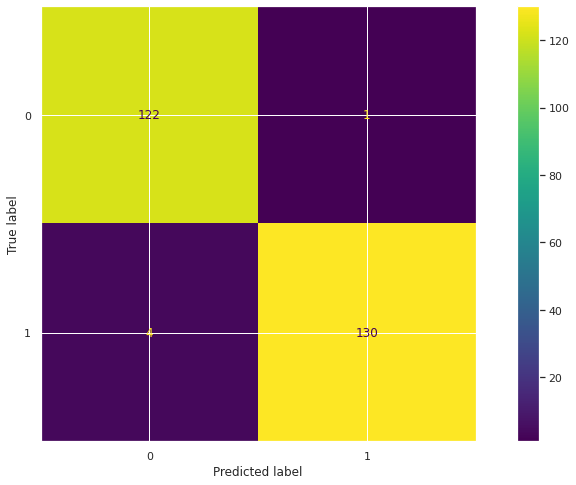

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, accuracy_score
score_nn = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred) 
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = ['0','1'])
cm_display.plot()
plt.show()

In [ ]:
score_nn = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(score_nn*100)
print(classification_report(y_test,y_pred))

98.0544747081712
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       123
           1       0.99      0.97      0.98       134

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



In [ ]:
scores = [score_lr,score_dt,score_nb,score_knn,score_rf,score_nn]
algorithms = ["Logistic Regression","Decision Tree","Naive Bayes","K-Nearest Neighbors","Random Forest","Neural Networks"]    

for i in range(len(algorithms)):
    print("The accuracy achieved using "+algorithms[i]+" is: "+str(round(scores[i]*100,2))+" %")

The accuracy achieved using Logistic Regression is: 86.38 %
The accuracy achieved using Decision Tree is: 99.22 %
The accuracy achieved using Naive Bayes is: 84.44 %
The accuracy achieved using K-Nearest Neighbors is: 96.11 %
The accuracy achieved using Random Forest is: 100.0 %
The accuracy achieved using Neural Networks is: 98.05 %


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


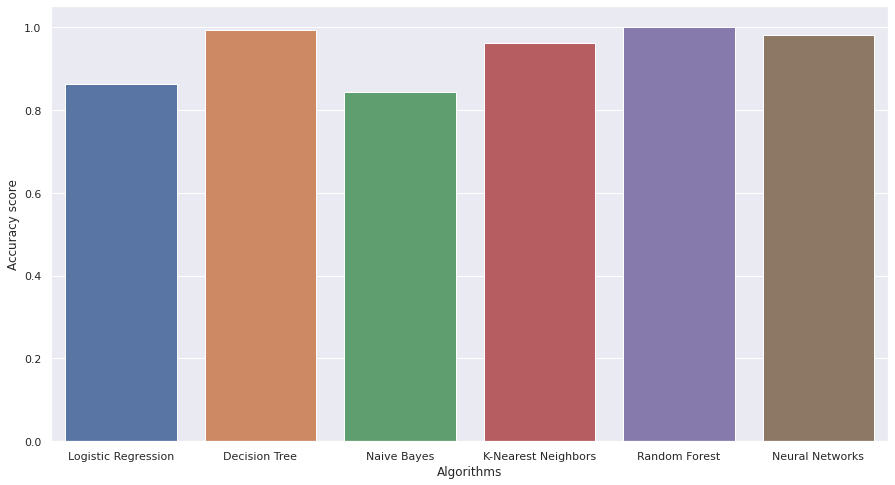

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

**Hence, Random Forest gives best accuracy (i.e. 100%) compared to all other models**

## **FEATURE EXTRACTION**

In [ ]:
feature_importance=pd.DataFrame(classifier.feature_importances_,index=X.columns,columns=['importance']).sort_values('importance')
feature_importance

,importance
fbs,0.010608
restecg,0.020911
sex,0.042388
slope,0.049163
exang,0.062151
trestbps,0.071733
chol,0.077955
thal,0.097186
age,0.097198
oldpeak,0.104479


In [ ]:
feature_importance.sum()

importance    1.0
dtype: float64

Taking above 0.09;

In [ ]:
x1 = df.drop(['fbs','restecg','sex','slope','exang','trestbps','chol'],axis=1)
x1

,age,cp,thalach,oldpeak,ca,thal,target
0,52,0,168,1.0,2,3,0
1,53,0,155,3.1,0,3,0
2,70,0,125,2.6,0,3,0
3,61,0,161,0.0,1,3,0
4,62,0,106,1.9,3,2,0
...,...,...,...,...,...,...,...
1020,59,1,164,0.0,0,2,1
1021,60,0,141,2.8,1,3,0
1022,47,0,118,1.0,1,2,0
1023,50,0,159,0.0,0,2,1


In [ ]:
y1 = df['target']
y1

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler 
st_x = StandardScaler()
x_train1 = st_x.fit_transform(x_train1)
x_test1 = st_x.fit_transform(x_test1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train1,y_train1)

LogisticRegression()

In [ ]:
y1_pred = lr.predict(x_test1)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test1,y1_pred))
print(classification_report(y_test1,y1_pred))

[[123   0]
 [  0 134]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       134

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train1,y_train1)

DecisionTreeClassifier()

In [ ]:
y2_pred = dtree.predict(x_test1)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test1,y2_pred))
print(classification_report(y_test1,y2_pred))

[[123   0]
 [  0 134]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       134

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257

